# 7. La classification hiérarchique ascendante et le K-Means selon le taux de chômage (1 dimension)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
data_communes = pd.read_excel(".../Inegalites2018_IDFCommunes.xlsx")
data_communes

,Code géographique,Région,Département,Latitude,Longitude,Libellé géographique,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,...,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration,CSP dominante,Niveau d'éducation,Niveau d'immigration,Typologie du revenu
0,95633,11,95,"49,00049673","2,486429562",Vaudherland,22980,0.254,0.090,0.388,...,0.100,0.000,0.200,0.400,0.300,0.081,Employés et ouvriers,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible
1,77009,11,77,"48,18127559","2,55657978",Arville,27820,0.192,0.040,0.313,...,0.000,0.111,0.444,0.333,0.111,0.000,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré
2,77134,11,77,"48,64252262","3,28982875",Courchamp,23400,0.132,0.113,0.245,...,0.000,0.273,0.091,0.545,0.091,0.048,Employés et ouvriers,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible
3,77271,11,77,"48,18279297","2,621229709",Maisoncelles-en-Gâtinais,21690,0.290,0.060,0.290,...,0.000,0.000,0.556,0.222,0.222,0.082,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible
4,95110,11,95,"49,13955373","1,943521002",Brignancourt,28900,0.117,0.019,0.195,...,0.000,0.375,0.375,0.188,0.063,0.048,Catégorie moyenne,Bien instruit (Enseignement sup.),Faible,Modéré
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,95304,11,95,"49,15849636","2,177680345",Hédouville,34290,0.051,0.051,0.194,...,0.056,0.389,0.389,0.167,0.000,0.043,Cadres et ingénieurs,Bien instruit (Enseignement sup.),Faible,Elevé
1267,95308,11,95,"49,10489391","2,127220469",Hérouville-en-Vexin,30150,0.126,0.042,0.251,...,0.061,0.242,0.364,0.197,0.121,0.038,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré
1268,95447,11,95,"49,17378477","1,980231533",Neuilly-en-Vexin,27530,0.147,0.064,0.192,...,0.150,0.300,0.200,0.300,0.050,0.027,Cadres et ingénieurs,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré
1269,95459,11,95,"49,15953932","1,856434093",Nucourt,26580,0.212,0.040,0.280,...,0.030,0.269,0.284,0.207,0.180,0.035,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré


In [ ]:
#Copier le DataSet
communes_socioeco = data_communes.copy()

#Accéder aux colonnes du DataSet
communes_socioeco.columns

Index(['Code géographique', 'Région', 'Département', 'Latitude', 'Longitude',
       'Libellé géographique', 'Médiane (€)',
       'Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup', 'Taux d'emploi 15-64 ans',
       'Taux de chômage 15-64 ans',
       'Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ',
       'Taux d'immigration', 'CSP dominante', 'Niveau d'éducation',
       'Niveau d'immigration', 'Typologie du revenu'],
      dtype='object')

In [ ]:
#Les librairies pour le clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [ ]:
chomage = communes_socioeco["Taux de chômage 15-64 ans"]
data_chom = pd.DataFrame({"Taux de chômage 15-64 ans":chomage}).set_index(communes_socioeco['Code géographique'])
data_chom

,Taux de chômage 15-64 ans
Code géographique,
95633,0.121
77009,0.066
77134,0.083
77271,0.065
95110,0.052
...,...
95304,0.049
95308,0.069
95447,0.083


In [ ]:
#Convertir la variable "Taux d'emploi" en vecteur
chom = np.array(chomage)
chom=chom.reshape(-1,1)
chom

array([[0.121],
       [0.066],
       [0.083],
       ...,
       [0.083],
       [0.086],
       [0.075]])

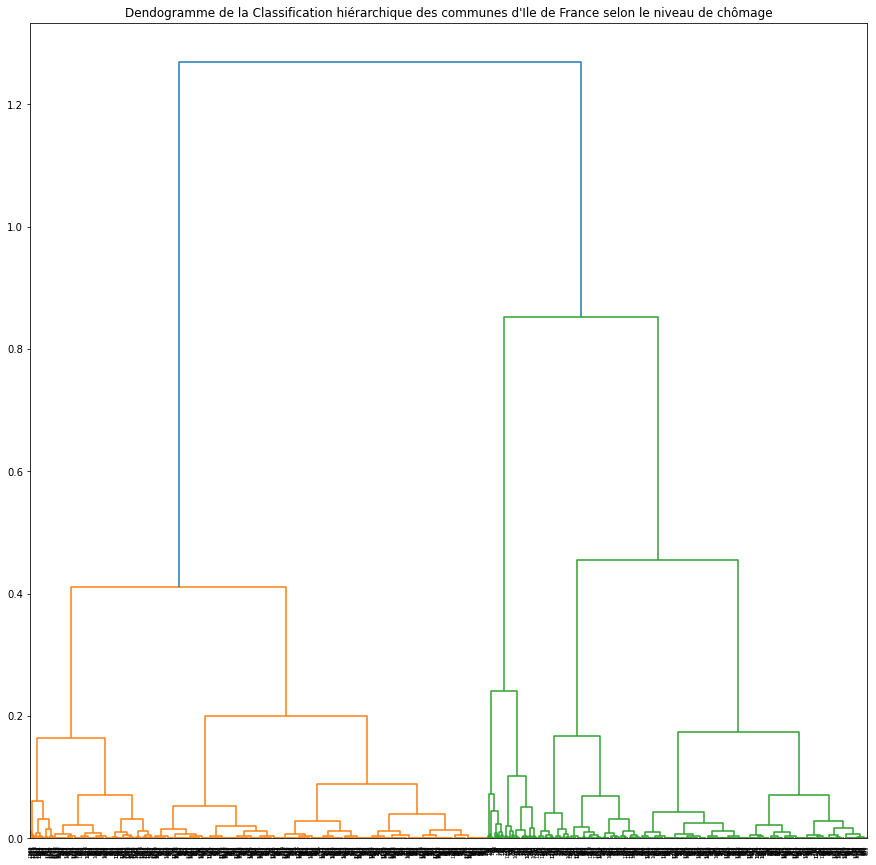

In [ ]:
#Mise en place de la classification hiérarchique ascendante du niveau de chômage
Z = sch.linkage(chom,method='ward',metric='euclidean')

#Afficher le dendrogramme
plt.figure(figsize=(15,15))
plt.title("Dendogramme de la Classification hiérarchique des communes d'Ile de France selon le niveau de chômage")
dendrogram = sch.dendrogram(sch.linkage(chom, method  = "ward"))
plt.show()

Text(0.5, 1.0, 'K-Means par la méthode des centres mobiles')

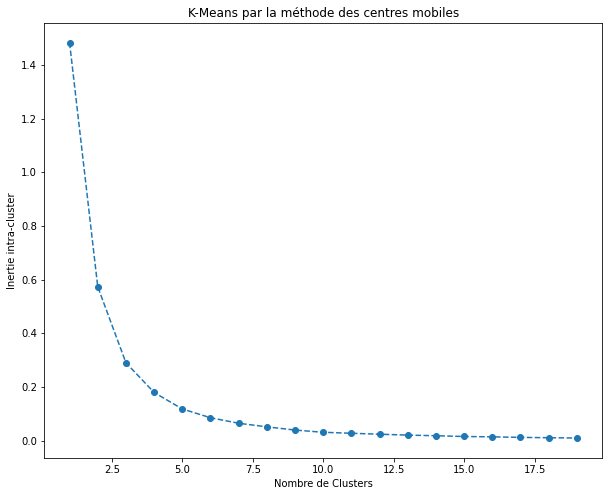

In [ ]:
#Courbe de l'inertie intra-cluster pour le K-Means
inertie_intra = []
for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++',random_state=42)
    kmeans_pca.fit(chom)
    inertie_intra.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,20),inertie_intra, marker='o',linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie intra-cluster')
plt.title('K-Means par la méthode des centres mobiles')

En utilisant la "méthode du coude", nous devons prendre 3 clusters selon le niveau d'activité : **faible et elevé**

In [ ]:
#Nuage des individus avec les 3 strates
kmeans_pca_act = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans_pca_act.fit(chom)

KMeans(n_clusters=2, random_state=42)

In [ ]:
#Créer les nouvelles colonnes dans le DataFrame
data_chom['Numéro de cluster']=kmeans_pca_act.labels_
data_chom

,Taux de chômage 15-64 ans,Numéro de cluster
Code géographique,,
95633,0.121,1
77009,0.066,0
77134,0.083,0
77271,0.065,0
95110,0.052,0
...,...,...
95304,0.049,0
95308,0.069,0
95447,0.083,0


In [ ]:
#Traduire les numéros de clusters
data_chom["Niveau de chômage"]=data_chom["Numéro de cluster"].map({0:'Faible',1:'Elevé'})
data_chom

,Taux de chômage 15-64 ans,Numéro de cluster,Niveau de chômage
Code géographique,,,
95633,0.121,1,Elevé
77009,0.066,0,Faible
77134,0.083,0,Faible
77271,0.065,0,Faible
95110,0.052,0,Faible
...,...,...,...
95304,0.049,0,Faible
95308,0.069,0,Faible
95447,0.083,0,Faible


C:\Users\almou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


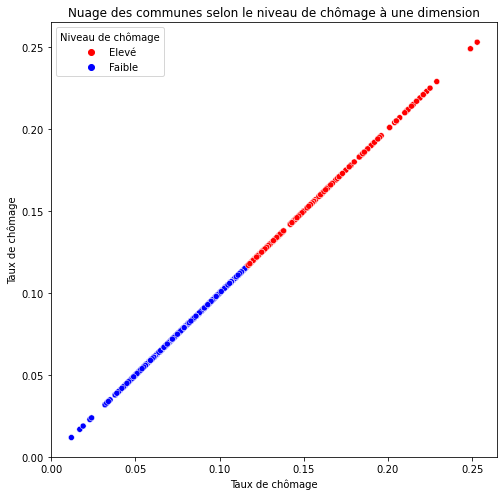

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
sns.scatterplot(data_chom.iloc[:,0],data_chom.iloc[:,0], hue = data_chom["Niveau de chômage"], palette = ['r','b'])
plt.title("Nuage des communes selon le niveau de chômage à une dimension")
plt.xlabel("Taux de chômage")
plt.ylabel("Taux de chômage")
plt.show()

In [ ]:
data_chom.to_excel('.../Chomage2018IDF.xlsx')